# The SIR-Model
$S(t)$: suszeptible individuals, $I(t)$ infected individuals, $R(t)$ resistant individuals, $D(t)$ deaths.
\begin{align}
\dot{S}(t)&=-\mu S(t)+\kappa N(t)-\beta S(t)\cdot\frac{I(t)}{N(t)}\\
\dot{I}(t)&=-(\mu +\lambda) I(t)+\beta S(t)\cdot\frac{I(t)}{N(t)}-\nu I(t)\\
\dot{R}(t)&=-\mu R(t)+\nu I(t)\\
\dot{D}(t)&=\mu N(t)+\lambda I(t)\\
N(t)&=S(t)+I(t)+R(t)
\end{align}
where $\mu$ is the mortality rate of the population without the disease, $\lambda$ is the letality due to the disease, $\kappa$ is the birth rate, $\beta$ is the rate at which a suszeptible gets infected, and $\nu$ is the rate at which an infected individual recovers.

In [1]:
import numpy as np # Numpy replaces the functionality of MatLab in python
from scipy.integrate import odeint # Scipy integrate is for numerical integration odeint is self explaining
import matplotlib.pyplot as plt # This is for plotting and
from mpl_toolkits.mplot3d import Axes3D # this one for 3D represention
import time

In the following we analys a much simpler model not taking into account neither the mortality rate nor the birth rate (assume they are more or less equal), to read
\begin{align}
\dot{S}(t)&=-\beta S(t)\cdot\frac{I(t)}{N(t)}\\
\dot{I}(t)&=\beta S(t)\cdot\frac{I(t)}{N(t)}-\nu I(t)\\
\dot{R}(t)&=\nu I(t)\\
\end{align}
The key point is the knowledge of $I(0)$, $\beta$, and $\nu$. Assume that we do not loose anyone, so N=const.=1. This reduces to the simple system:
\begin{align}
\dot{S}(t)&=-a S(t)\cdot I(t)+c\cdot R(t)-d\cdot S(t)\\
\dot{I}(t)&=a S(t)\cdot I(t)-b\cdot I(t)\\
\dot{R}(t)&=b\cdot I(t)-c\cdot R(t)+d\cdot S(t)\\
\end{align}
We set c=0. Interpretation

In [1]:
def func(n,t):
    s,i,r=n
    a=10.      # rate of infection
    b=.1      # rate of recovery
    c=.1      # rate of suszeptibility
    d=1.      # rate of vaccination
    # here you enter the differential equation system
    dsdt=-a*s*i+c*r-d*s
    didt=a*s*i-b*i
    drdt=b*i-c*r+d*s
    #
    return dsdt,didt,drdt

In [6]:
# here you integrate the DE and make a side by side plot
starttime=time.time()
eps=0.1
n0=[1.0-eps,eps,0.]
t=np.linspace(0,100,100000)  # We do 10000 steps in the iterval [0,100]
pos=odeint(func,n0,t) # Integrate the system of differential equations
endtime=time.time()
print("{} s".format(endtime-starttime))

0.016876935958862305 s


<IPython.core.display.Javascript object>


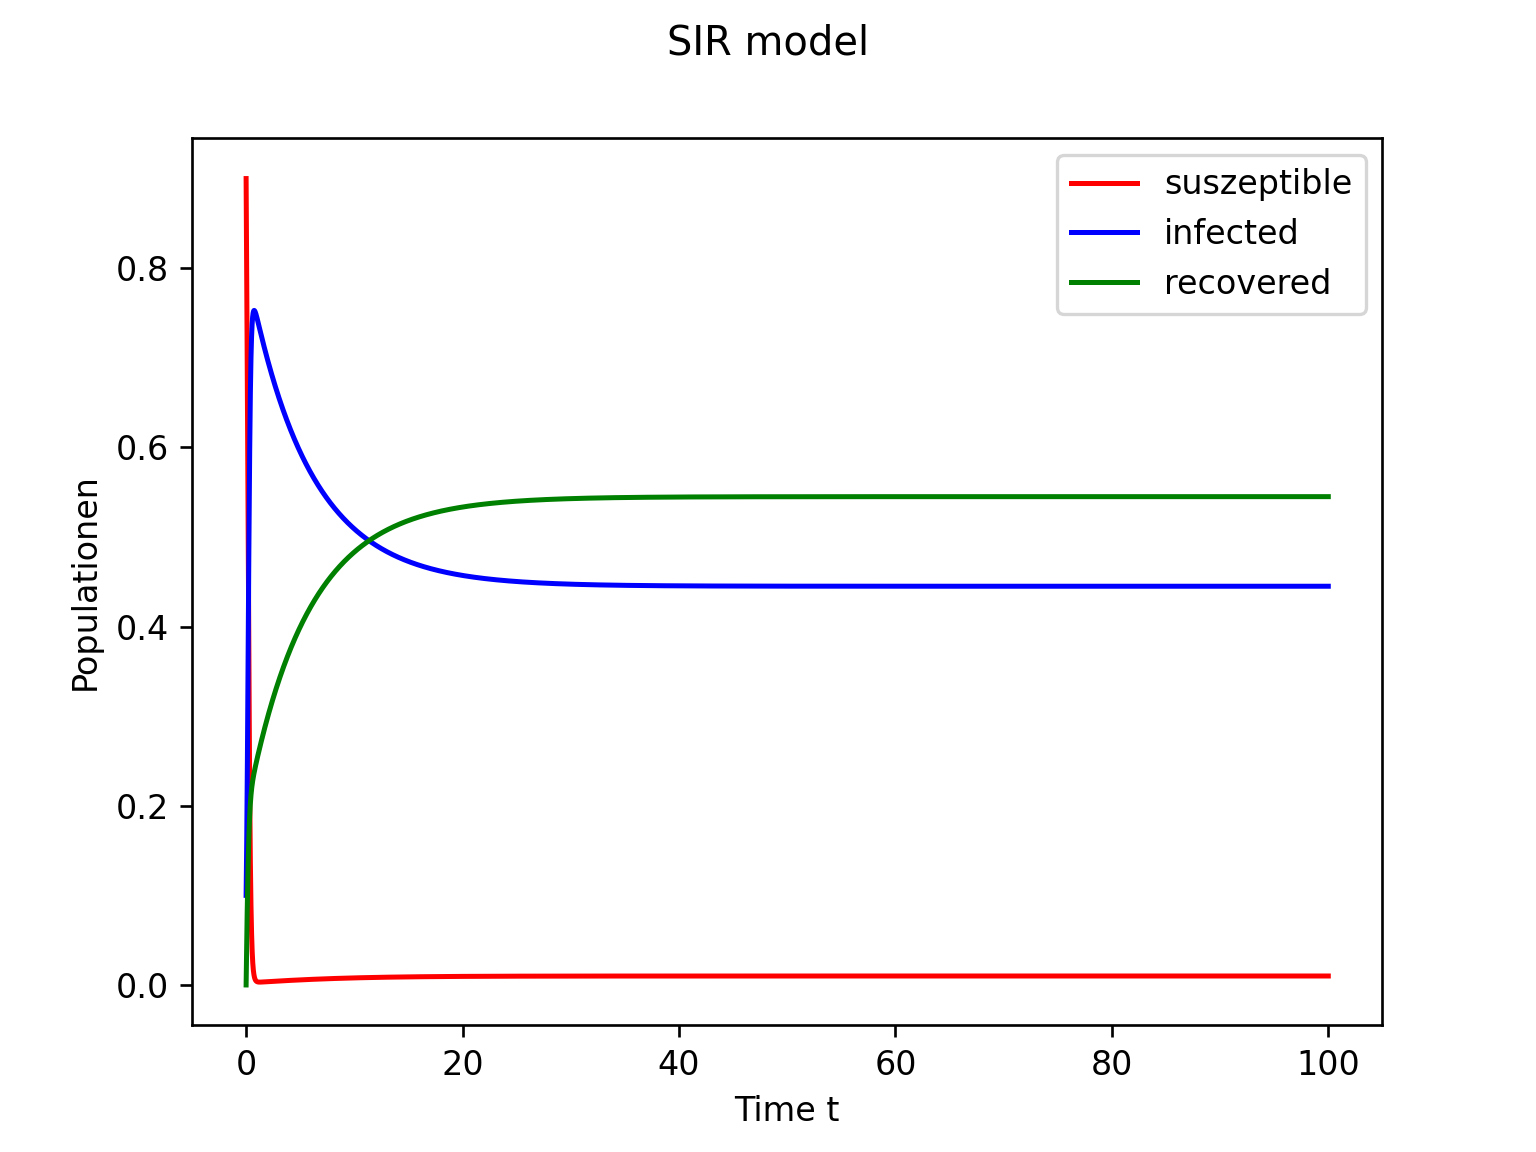

Text(0.5, 0.98, 'SIR model')

In [7]:
%matplotlib notebook
s=pos.T[0]
i=pos.T[1]
r=pos.T[2]
#
#fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2) # Let's make two subplot side by side addressed by ax1 ans ax2
#fig.tight_layout()
fig, ax4 = plt.subplots(1,1) 
#ax1.set_title('Phase space i(t) over s(t)') # This sets the title of the left plot
#ax1.set_aspect(.1)       # set the aspect ratio of the graph
#ax1.set_xlabel('s(t)')  # the label on the x-axes
#ax1.set_ylabel('i(t)')  # the label on the y-axes
#ax1.plot(i,r,'-')       # phase space plot
#
#ax2.set_title('Phase space r(t) over i(t)') # This sets the title of the left plot
#ax2.set_aspect(.1)       # set the aspect ratio of the graph
#ax2.set_xlabel('s(t)')  # the label on the x-axes
#ax2.set_ylabel('r(t)')  # the label on the y-axes
#ax2.plot(s,r,'-')       # phase space plot
#
#ax3.set_title('Phase space r(t) over s(t)') # This sets the title of the left plot
#ax3.set_aspect(.1)       # set the aspect ratio of the graph
#ax3.set_xlabel('i(t)')  # the label on the x-axes
#ax3.set_ylabel('r(t)')  # the label on the y-axes
#ax3.plot(i,r,'-')       # phase space plot
#
#ax4.set_aspect(30)      # set the apsect ...
ax4.set_xlabel('Time t')
ax4.set_ylabel('Populationen')
#ax4.yaxis.tick_right()
#ax4.yaxis.set_label_position("right")
ax4.plot(t,s,'r',label="suszeptible")       # plot s(t)
ax4.plot(t,i,'b',label="infected")       # plot i(t)
ax4.plot(t,r,'g',label="recovered")       # plot i(t)
ax4.legend()
#ax4.set_title('Amplitude x(t) and y(t)')
fig.savefig('SIR.svg', format = 'svg', dpi=300) # save the figure as a vector graphic
fig.savefig('SIR.pdf', format = 'pdf') # save it as a pdf
fig.suptitle('SIR model')